In [1]:
import warnings
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.isnull().sum()
df.info()
df.describe()
df.skew()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [7]:
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [8]:
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [9]:
df['generation_gwh_2013'].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

In [10]:
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [11]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [12]:
df.drop(columns=["country","country_long","other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],
        axis=1, inplace=True)

In [14]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.drop("generation_gwh_2013",axis=1,inplace=True)

In [16]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['latitude'].mean()
df["other_fuel1"].mode()
df["geolocation_source"].mode()
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [18]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN


<AxesSubplot:>

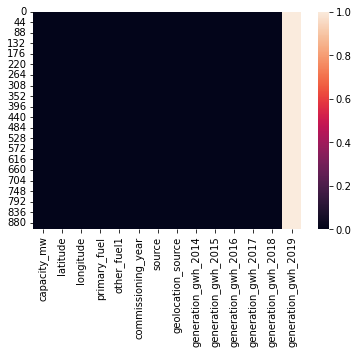

In [19]:
sns.heatmap(df.isnull())

In [20]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [21]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [22]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN


In [24]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,0.0
mean,326.223755,21.197918,77.427103,1998.728776,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,NaN
std,590.085456,6.079148,4.815073,13.158621,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,NaN
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1998.000000,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2003.000000,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


# VISUALIZATION:UNIVARIENT

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


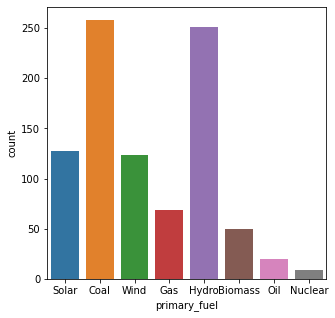

In [25]:
print(df['primary_fuel'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['primary_fuel'])
plt.show()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


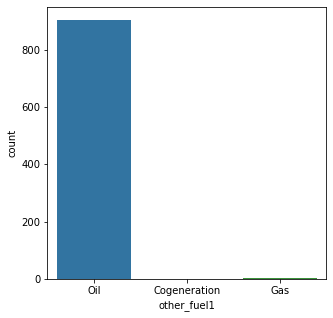

In [26]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


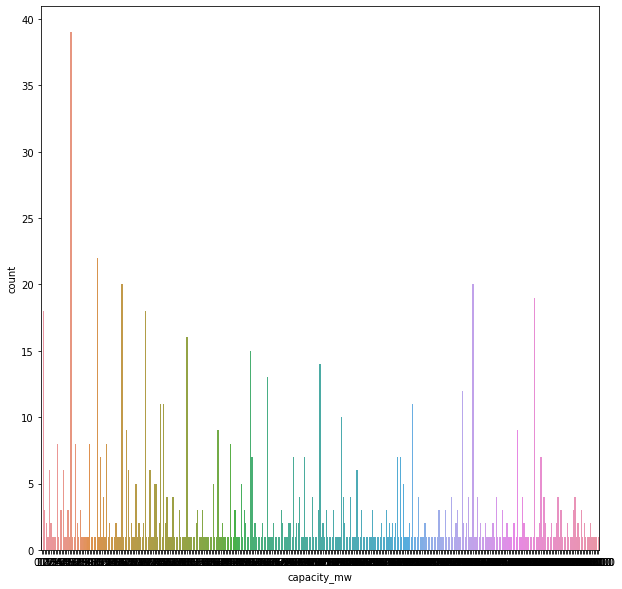

In [27]:
print(df['capacity_mw'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

# CHECKING NUMERICAL AND CATEGORICAL VALUES

In [28]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [29]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']


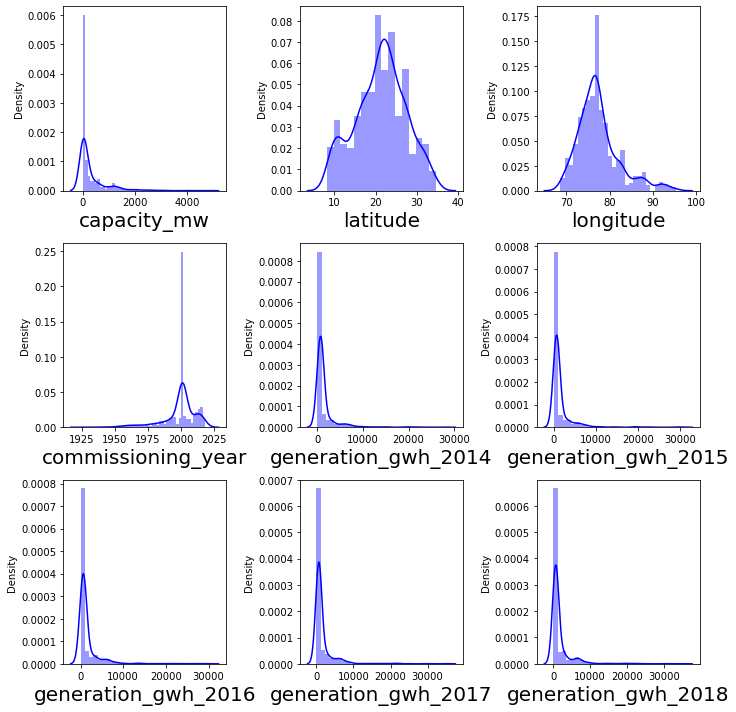

In [30]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# VISUALIZATION : BIVARIANT

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

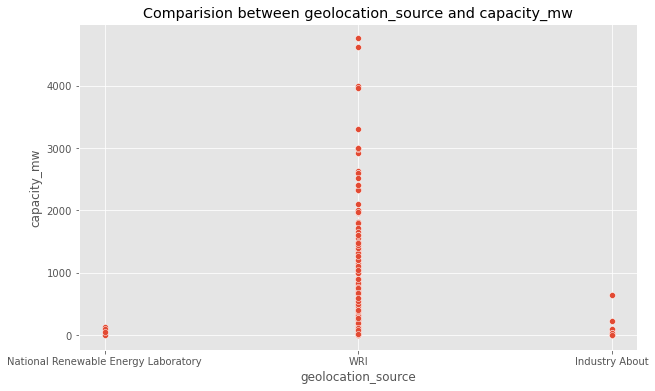

In [31]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

In [32]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

In [33]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,NaN


In [34]:
df.drop("generation_gwh_2019",axis=1,inplace=True)

In [35]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


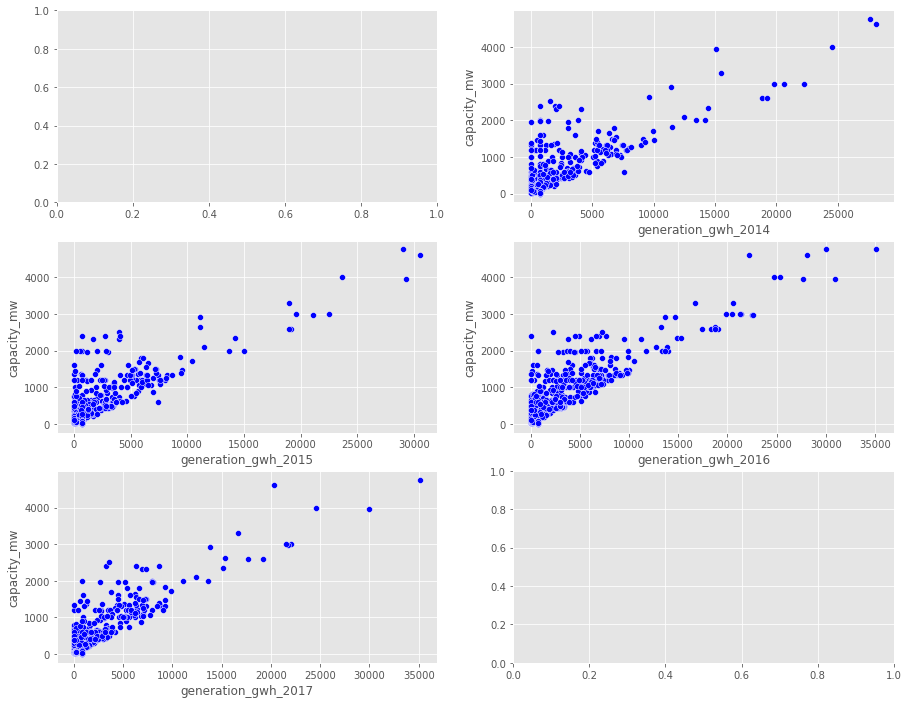

In [36]:
fig,axes=plt.subplots(3,2,figsize=(15,12))
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,1],data=df,color="b")

sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[1,0],data=df,color="b")

sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,1],data=df,color="b")

sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[2,0],data=df,color="b")

sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="b")

plt.show()

In [37]:
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

In [38]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


# CORRELATION BETWEEN LABEL AND TARGET 'PRIMARY_FUEL'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='primary_fuel'>

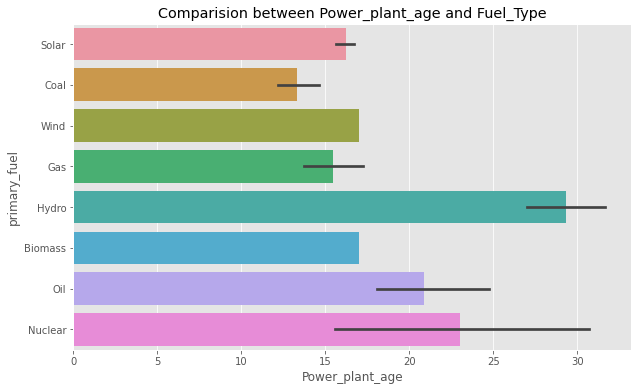

In [39]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(df['Power_plant_age'],df["primary_fuel"])

<AxesSubplot:title={'center':'Comparision between latitude and primary_fuel'}, xlabel='latitude', ylabel='primary_fuel'>

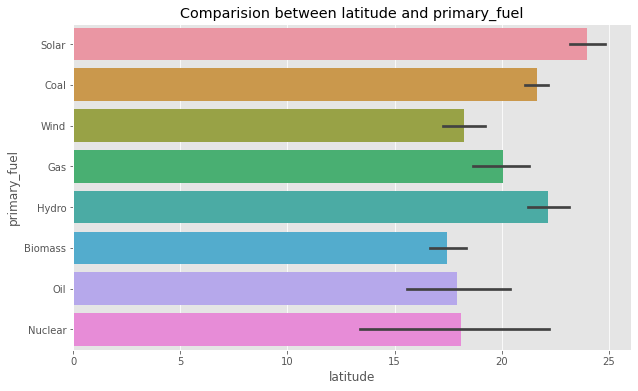

In [40]:
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['latitude'],df["primary_fuel"])

<AxesSubplot:title={'center':'Comparision between longitude and primary_fuel'}, xlabel='longitude', ylabel='primary_fuel'>

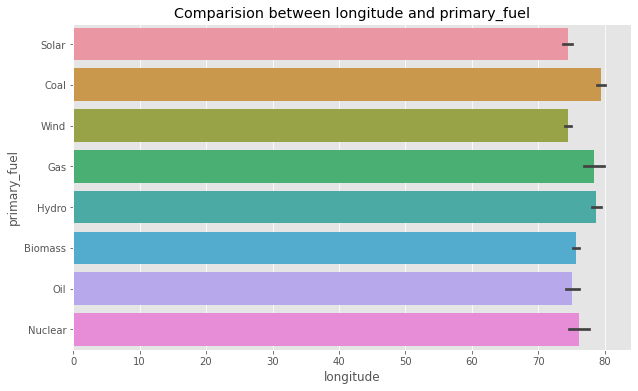

In [41]:
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and primary_fuel')
sns.barplot(df['longitude'],df["primary_fuel"])

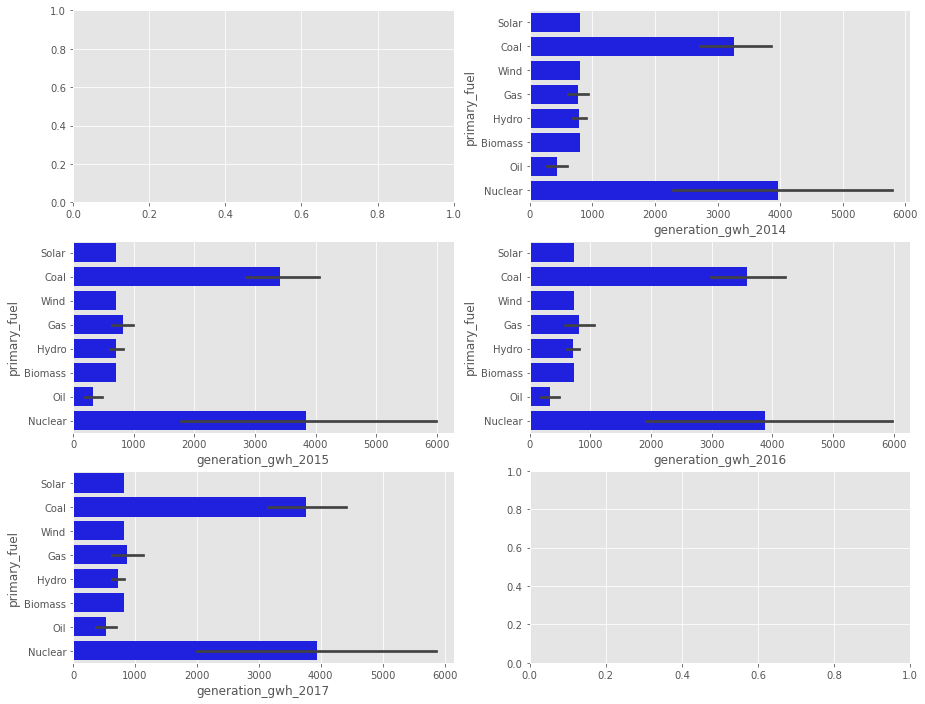

In [42]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

sns.barplot(x='generation_gwh_2014',y='primary_fuel',ax=axes[0,1],data=df,color="b")

sns.barplot(x='generation_gwh_2015',y='primary_fuel',ax=axes[1,0],data=df,color="b")

sns.barplot(x='generation_gwh_2016',y='primary_fuel',ax=axes[1,1],data=df,color="b")

sns.barplot(x='generation_gwh_2017',y='primary_fuel',ax=axes[2,0],data=df,color="b")
plt.show()

# RELATION B/W BOTH TARGET(capacity_mw AND primary_fuel)

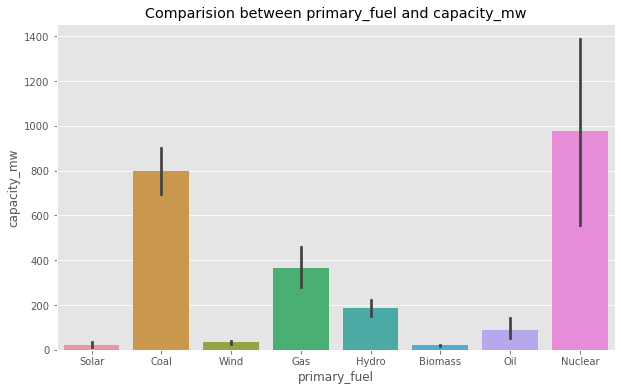

In [43]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

# LABEL ENCODING

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

In [46]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [47]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [48]:
df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# OUTLIERS

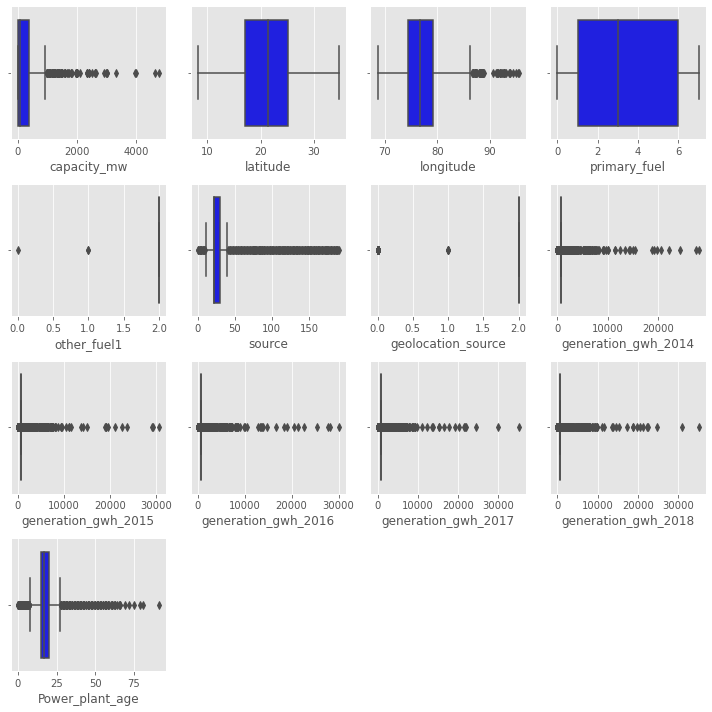

In [49]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [50]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [51]:
feature=df[['longitude','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','Power_plant_age']]

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(feature))

In [53]:
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.237227
...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.172699


In [54]:
newdf = df[(z<3).all(axis=1)]
newdf

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [55]:
corr=newdf.corr()

In [56]:
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050048,0.257383,-0.398217,-0.001441,-0.275072,0.233871,0.615801,0.674601,0.748505,0.792419,0.820062,-0.245110
latitude,0.050048,1.000000,-0.014135,-0.002573,0.037050,0.069413,-0.203314,0.081653,0.071346,0.057236,0.070829,0.063495,-0.096958
longitude,0.257383,-0.014135,1.000000,-0.383326,0.029222,-0.235970,0.263930,0.119811,0.154708,0.196012,0.197348,0.204322,-0.080772
primary_fuel,-0.398217,-0.002573,-0.383326,1.000000,0.006395,0.039112,-0.478753,-0.250588,-0.276529,-0.287871,-0.290991,-0.299184,0.075706
other_fuel1,-0.001441,0.037050,0.029222,0.006395,1.000000,0.028433,-0.022798,-0.000491,0.006114,0.015561,0.011987,0.022658,-0.058132
source,-0.275072,0.069413,-0.235970,0.039112,0.028433,1.000000,-0.498012,-0.141798,-0.156488,-0.159255,-0.157090,-0.165544,-0.074509
geolocation_source,0.233871,-0.203314,0.263930,-0.478753,-0.022798,-0.498012,1.000000,0.113695,0.125473,0.127691,0.125956,0.132735,0.050944
generation_gwh_2014,0.615801,0.081653,0.119811,-0.250588,-0.000491,-0.141798,0.113695,1.000000,0.912174,0.800971,0.743005,0.728678,-0.060584
generation_gwh_2015,0.674601,0.071346,0.154708,-0.276529,0.006114,-0.156488,0.125473,0.912174,1.000000,0.907191,0.825737,0.809376,-0.130635
generation_gwh_2016,0.748505,0.057236,0.196012,-0.287871,0.015561,-0.159255,0.127691,0.800971,0.907191,1.000000,0.931186,0.906540,-0.201005


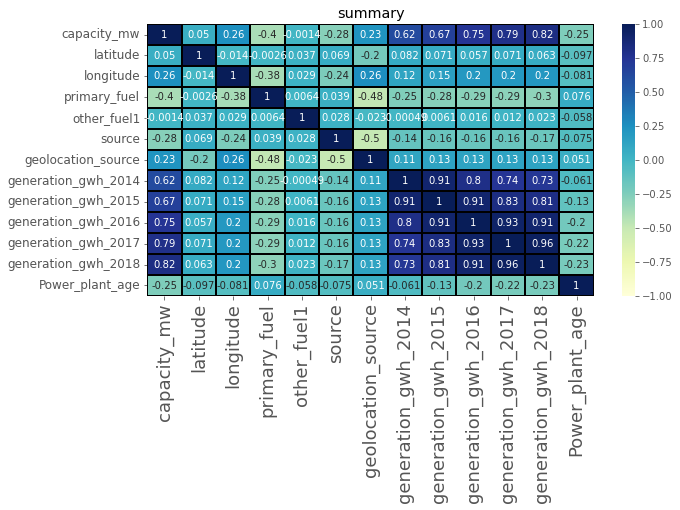

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(newdf.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",cmap="YlGnBu")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('summary')
plt.savefig('heatmap.png')
plt.show()

# VISUALIZING THE CORRELATION B/W LABEL AND FEATURES USING BAR PLOT

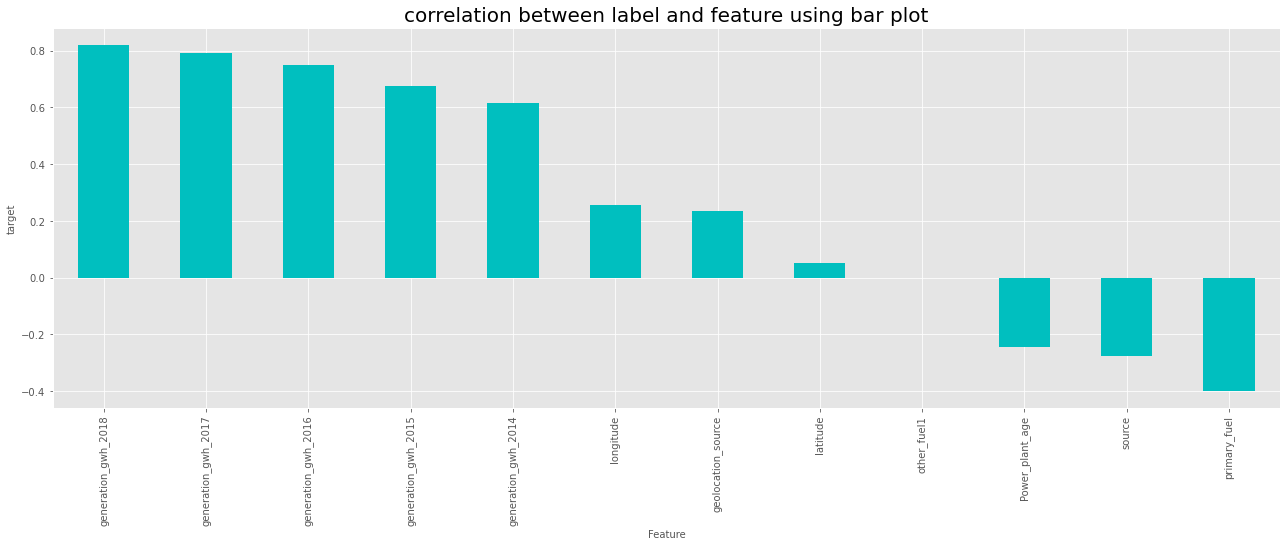

In [58]:
plt.figure(figsize=(22,7))
newdf.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

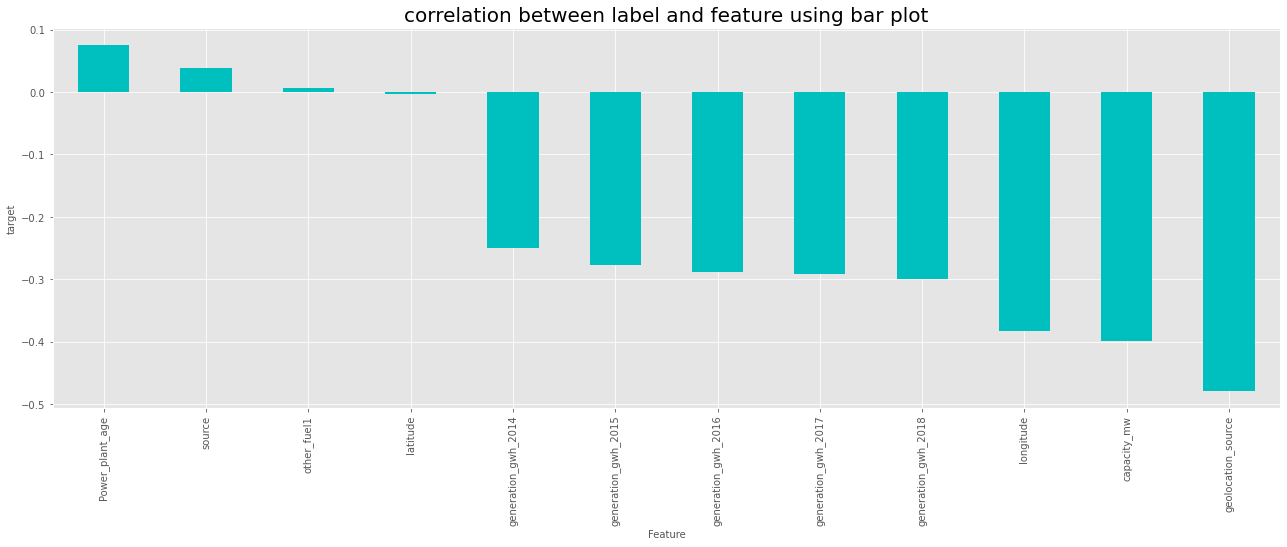

In [59]:
plt.figure(figsize=(22,7))
newdf.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [60]:
newdf.drop("other_fuel1",axis=1,inplace=True)
newdf.drop("latitude",axis=1,inplace=True)

In [61]:
newdf.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [62]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

PREDICTION(1.Capacity_mw)

In [63]:
x=newdf.drop('capacity_mw', axis=1)
y=newdf["capacity_mw"]

In [64]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.879750,1.176685,1.399156,-1.037509,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-1.005721
1,-0.561360,-0.974679,2.823623,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
2,-1.779677,1.606958,-0.529352,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
3,3.336470,-0.544406,-0.507437,0.406866,-0.402726,-0.222387,-0.221598,-0.400691,-0.395783,-0.377053
4,1.253642,-0.974679,-0.507437,0.406866,1.223124,3.068479,3.099292,2.389325,3.293676,-1.364959
...,...,...,...,...,...,...,...,...,...,...
847,0.078024,-0.974679,-0.507437,0.406866,-0.279440,-0.769122,-0.626037,-0.281555,-0.362364,-1.454769
848,0.266177,1.176685,0.697881,-2.481884,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
849,-0.335163,1.606958,-0.529352,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
850,-0.761776,-0.974679,0.303413,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624


# MULTI-COLINEARITY

In [65]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.264149,longitude
1,1.733318,primary_fuel
2,1.569608,source
3,1.883711,geolocation_source
4,6.299317,generation_gwh_2014
5,12.750386,generation_gwh_2015
6,14.328330,generation_gwh_2016
7,18.941206,generation_gwh_2017
8,14.033952,generation_gwh_2018
9,1.107043,Power_plant_age


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [67]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8509635974992837 Random_State 71


# TRAIN_TEST_SPLIT

In [68]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

In [69]:
LR = LinearRegression()
rf=RandomForestRegressor()
knn=KNN()
gb=GradientBoostingRegressor()
br=BaggingRegressor()

In [70]:
LR.fit(x_train,y_train)

predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

print('MAE:',metrics.mean_absolute_error(y_test, predLR))

print('MSE:',metrics.mean_squared_error(y_test, predLR))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.8094937800644221
MAE: 133.5150558110392
MSE: 40116.54133785199
RMSE: 200.29114143629016


In [71]:
rf.fit(x_train,y_train)

predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

print('MAE:',metrics.mean_absolute_error(y_test, predrf))

print('MSE:',metrics.mean_squared_error(y_test, predrf))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.8473535809933703
MAE: 98.16420680130082
MSE: 32144.07582190925
RMSE: 179.28769010143793


In [72]:
knn.fit(x_train,y_train)

predknn=knn.predict(x_test)
print('R2_score:',r2_score(y_test,predknn))

print('MAE:',metrics.mean_absolute_error(y_test, predknn))

print('MSE:',metrics.mean_squared_error(y_test, predknn))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_score: 0.8262644314082945
MAE: 100.42065390625001
MSE: 36585.00033028453
RMSE: 191.27205841493034


In [73]:
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_score:',r2_score(y_test,predgb))

print('MAE:',metrics.mean_absolute_error(y_test, predgb))

print('MSE:',metrics.mean_squared_error(y_test, predgb))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_score: 0.7949468593660362
MAE: 115.26811577126315
MSE: 43179.812162986185
RMSE: 207.797526845211


In [74]:
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_score:',r2_score(y_test,predbr))

print('MAE:',metrics.mean_absolute_error(y_test, predbr))

print('MSE:',metrics.mean_squared_error(y_test, predbr))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_score: 0.8312627174456291
MAE: 98.94398159418706
MSE: 35532.46803762266
RMSE: 188.5005783482445


# CROSS-VALIDATION

In [75]:
print(cross_val_score(LR,x,y,cv=5).mean())

print(cross_val_score(rf,x,y,cv=5).mean())

print(cross_val_score(knn,x,y,cv=5).mean())

print(cross_val_score(gb,x,y,cv=5).mean())

print(cross_val_score(br,x,y,cv=5).mean())

0.7000896440233058
0.7816554994515493
0.7673963964973686
0.7635615877022055
0.7718002233021071


# PREDICTION(2.Primary Fuel)

In [76]:
xdf=newdf.drop('primary_fuel', axis=1)
ydf=newdf["primary_fuel"]

In [77]:
scaler = StandardScaler()
xdf = pd.DataFrame(scaler.fit_transform(xdf), columns=xdf.columns)
xdf

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.613098,-0.879750,1.399156,-1.037509,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-1.005721
1,-0.402730,-0.561360,2.823623,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
2,-0.532255,-1.779677,-0.529352,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
3,-0.321226,3.336470,-0.507437,0.406866,-0.402726,-0.222387,-0.221598,-0.400691,-0.395783,-0.377053
4,3.346439,1.253642,-0.507437,0.406866,1.223124,3.068479,3.099292,2.389325,3.293676,-1.364959
...,...,...,...,...,...,...,...,...,...,...
847,2.905879,0.078024,-0.507437,0.406866,-0.279440,-0.769122,-0.626037,-0.281555,-0.362364,-1.454769
848,-0.611996,0.266177,0.697881,-2.481884,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
849,-0.562433,-0.335163,-0.529352,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624
850,-0.442381,-0.761776,0.303413,0.406866,-0.279440,-0.308389,-0.313841,-0.309576,-0.326236,-0.107624


# MULTI-COLINEARITY

In [78]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(xdf.values,i)
              for i in range(len(xdf.columns))]
vif["Features"] = xdf.columns

vif

,VIF values,Features
0,3.415611,capacity_mw
1,1.142801,longitude
2,1.416144,source
3,1.391500,geolocation_source
4,6.319493,generation_gwh_2014
5,12.737111,generation_gwh_2015
6,14.326013,generation_gwh_2016
7,18.943457,generation_gwh_2017
8,15.782258,generation_gwh_2018
9,1.132543,Power_plant_age


In [79]:
ydf.value_counts()

1    239
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# OVERSAMPLING

In [80]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [81]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xdf, ydf = sm.fit_resample(xdf,ydf)

In [82]:
ydf.value_counts()

6    239
1    239
7    239
2    239
3    239
0    239
5    239
4    239
Name: primary_fuel, dtype: int64

In [83]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test, y_train, y_test =train_test_split(xdf,ydf, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.95029362845935 Random_State 35


# TRAIN_TEST_SPLIT

In [84]:
x_train,x_test, y_train, y_test=train_test_split(xdf,ydf,test_size=.30, random_state=maxRS)

In [85]:
LR = LinearRegression()
rf=RandomForestRegressor()
knn=KNN()
gb=GradientBoostingRegressor()
br=BaggingRegressor()

In [86]:
LR.fit(x_train,y_train)

predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

print('MAE:',metrics.mean_absolute_error(y_test, predLR))

print('MSE:',metrics.mean_squared_error(y_test, predLR))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.363924022701531
MAE: 1.5392495937513648
MSE: 3.4396108289698137
RMSE: 1.8546187826531397


In [87]:
rf.fit(x_train,y_train)

predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

print('MAE:',metrics.mean_absolute_error(y_test, predrf))

print('MSE:',metrics.mean_squared_error(y_test, predrf))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.9490164097803337
MAE: 0.28554006968641116
MSE: 0.2756961672473867
RMSE: 0.5250677739562644


In [88]:
knn.fit(x_train,y_train)

predknn=knn.predict(x_test)
print('R2_score:',r2_score(y_test,predknn))

print('MAE:',metrics.mean_absolute_error(y_test, predknn))

print('MSE:',metrics.mean_squared_error(y_test, predknn))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_score: 0.7687449379987281
MAE: 0.5062717770034844
MSE: 1.2505226480836236
RMSE: 1.1182676996513954


In [89]:
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_score:',r2_score(y_test,predgb))

print('MAE:',metrics.mean_absolute_error(y_test, predgb))

print('MSE:',metrics.mean_squared_error(y_test, predgb))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb))) 

R2_score: 0.8844306133424005
MAE: 0.558181887811611
MSE: 0.6249469057661827
RMSE: 0.7905358345870115


In [90]:
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_score:',r2_score(y_test,predbr))

print('MAE:',metrics.mean_absolute_error(y_test, predbr))

print('MSE:',metrics.mean_squared_error(y_test, predbr))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_score: 0.9498571498329925
MAE: 0.2686411149825784
MSE: 0.2711498257839721
RMSE: 0.5207204871943989


# CROSS-VALIDATION

In [91]:
print(cross_val_score(LR,xdf,ydf,cv=5).mean())

print(cross_val_score(rf,xdf,ydf,cv=5).mean())

print(cross_val_score(knn,xdf,ydf,cv=5).mean())

print(cross_val_score(gb,xdf,ydf,cv=5).mean())

print(cross_val_score(br,xdf,ydf,cv=5).mean())

-2.4375984790040173
0.2341675050486848
-0.002792093500022785
-0.1864172236771851
0.16907260110474298


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# MODELING

In [93]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test, y_train, y_test =train_test_split(xdf,ydf, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.9487889005543496 Random_State 43


# LOGISTIC REGRESSION

CHECKING ACCURACY FOR LOGISTIC REGRESSION

In [94]:
xdf_train,xdf_test,ydf_train,ydf_test=train_test_split(xdf,ydf,test_size=.30,random_state=maxRS)
log = LogisticRegression()
log.fit(xdf_train,ydf_train)
predlog = log.predict(xdf_test)

print(accuracy_score(ydf_test, predlog))
print(confusion_matrix(ydf_test, predlog))
print(classification_report(ydf_test,predlog))

0.710801393728223
[[65  0  0  0  0  2  0 12]
 [ 7 25 10  2 11  2  0  3]
 [ 2  7 25 18  3  6  0  5]
 [ 1 10  5 27  3  6  0 15]
 [ 0  0  3  4 70  0  0  0]
 [13  1  1  2  0 49  0  9]
 [ 1  0  0  0  0  0 84  0]
 [ 0  0  0  2  0  0  0 63]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        79
           1       0.58      0.42      0.49        60
           2       0.57      0.38      0.45        66
           3       0.49      0.40      0.44        67
           4       0.80      0.91      0.85        77
           5       0.75      0.65      0.70        75
           6       1.00      0.99      0.99        85
           7       0.59      0.97      0.73        65

    accuracy                           0.71       574
   macro avg       0.69      0.69      0.68       574
weighted avg       0.71      0.71      0.70       574



# RANDOM FOREST CLASSIFIER

In [95]:
rf = RandomForestClassifier()
rf.fit(xdf_train,ydf_train)

predrf = rf.predict(xdf_test)

print(accuracy_score(ydf_test, predrf))
print(confusion_matrix(ydf_test, predrf))
print(classification_report(ydf_test,predrf))

0.9163763066202091
[[76  2  0  0  0  1  0  0]
 [ 4 43  4  2  6  1  0  0]
 [ 0  6 55  0  1  4  0  0]
 [ 0  5  3 57  2  0  0  0]
 [ 0  0  0  0 77  0  0  0]
 [ 1  1  0  5  0 68  0  0]
 [ 0  0  0  0  0  0 85  0]
 [ 0  0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        79
           1       0.75      0.72      0.74        60
           2       0.89      0.83      0.86        66
           3       0.89      0.85      0.87        67
           4       0.90      1.00      0.94        77
           5       0.92      0.91      0.91        75
           6       1.00      1.00      1.00        85
           7       1.00      1.00      1.00        65

    accuracy                           0.92       574
   macro avg       0.91      0.91      0.91       574
weighted avg       0.92      0.92      0.92       574



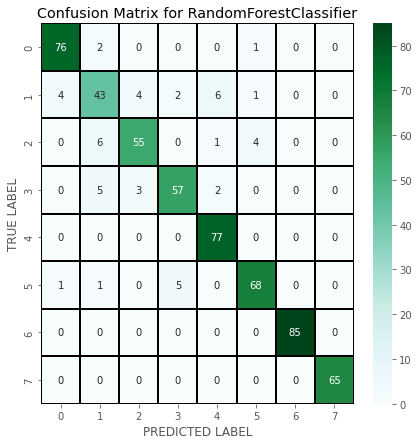

In [96]:
cm = confusion_matrix(ydf_test,predrf)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# DECISSION TREE CLASSIFIER

In [97]:
dtc = DecisionTreeClassifier()
dtc.fit(xdf_train,ydf_train)

preddtc = dtc.predict(xdf_test)

print(accuracy_score(ydf_test, preddtc))
print(confusion_matrix(ydf_test, preddtc))
print(classification_report(ydf_test,preddtc))

0.8710801393728222
[[72  4  0  0  0  3  0  0]
 [ 3 39  8  7  3  0  0  0]
 [ 0  9 46  6  2  3  0  0]
 [ 0  7  4 53  3  0  0  0]
 [ 0  2  0  2 73  0  0  0]
 [ 1  0  0  7  0 67  0  0]
 [ 0  0  0  0  0  0 85  0]
 [ 0  0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.64      0.65      0.64        60
           2       0.79      0.70      0.74        66
           3       0.71      0.79      0.75        67
           4       0.90      0.95      0.92        77
           5       0.92      0.89      0.91        75
           6       1.00      1.00      1.00        85
           7       1.00      1.00      1.00        65

    accuracy                           0.87       574
   macro avg       0.86      0.86      0.86       574
weighted avg       0.87      0.87      0.87       574



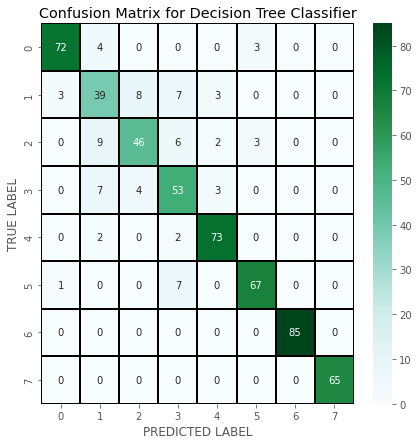

In [98]:
cm = confusion_matrix(ydf_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# SUPPORT VECTOR MACHINE CLASSIFIER

In [99]:
svc = SVC()
svc.fit(xdf_train,ydf_train)

predsvc = svc.predict(xdf_test)

print(accuracy_score(ydf_test, predsvc))
print(confusion_matrix(ydf_test, predsvc))
print(classification_report(ydf_test,predsvc))

0.7630662020905923
[[60  0  0  0  0  7  0 12]
 [ 7 30 11  0  5  2  0  5]
 [ 1  6 42  2  3  6  0  6]
 [ 0  5 17 24  3  3  0 15]
 [ 0  0  0  1 76  0  0  0]
 [ 5  0  2  0  0 58  0 10]
 [ 1  0  0  0  0  0 84  0]
 [ 0  0  1  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        79
           1       0.73      0.50      0.59        60
           2       0.58      0.64      0.60        66
           3       0.89      0.36      0.51        67
           4       0.87      0.99      0.93        77
           5       0.76      0.77      0.77        75
           6       1.00      0.99      0.99        85
           7       0.57      0.98      0.72        65

    accuracy                           0.76       574
   macro avg       0.78      0.75      0.74       574
weighted avg       0.79      0.76      0.75       574



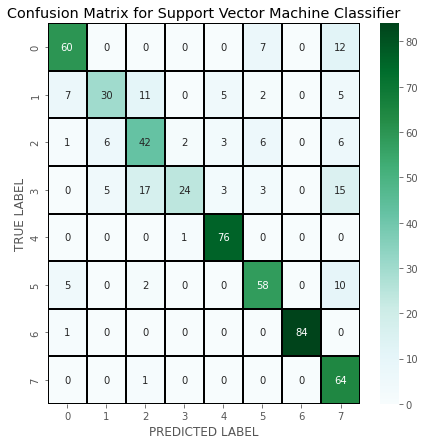

In [100]:
cm = confusion_matrix(ydf_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# GRADIENT BOOSTING CLASSIFIER

In [101]:
GB = GradientBoostingClassifier()
GB.fit(xdf_train,ydf_train)

predGB = GB.predict(xdf_test)

print(accuracy_score(ydf_test, predGB))
print(confusion_matrix(ydf_test, predGB))
print(classification_report(ydf_test,predGB))

0.9076655052264808
[[76  2  0  0  0  1  0  0]
 [ 2 45  5  1  7  0  0  0]
 [ 0  9 48  4  2  3  0  0]
 [ 0  4  2 57  4  0  0  0]
 [ 0  0  0  0 77  0  0  0]
 [ 1  0  1  5  0 68  0  0]
 [ 0  0  0  0  0  0 85  0]
 [ 0  0  0  0  0  0  0 65]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.75      0.75      0.75        60
           2       0.86      0.73      0.79        66
           3       0.85      0.85      0.85        67
           4       0.86      1.00      0.92        77
           5       0.94      0.91      0.93        75
           6       1.00      1.00      1.00        85
           7       1.00      1.00      1.00        65

    accuracy                           0.91       574
   macro avg       0.90      0.90      0.90       574
weighted avg       0.91      0.91      0.91       574



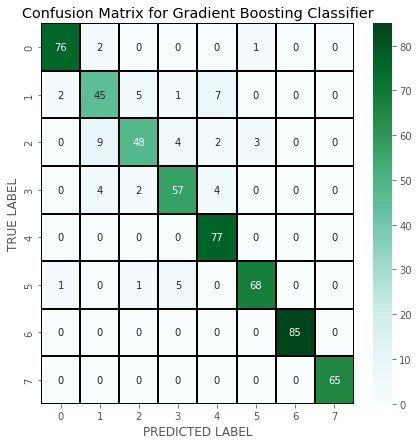

In [102]:
cm = confusion_matrix(ydf_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# HYPERPARAMETER TUNNING FOR THE MODEL WITH BEST SCORE

In [103]:
parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(xdf_train,ydf_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [104]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [105]:
primary_fuel =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
primary_fuel.fit(xdf_train, ydf_train)
pred = primary_fuel.predict(xdf_test)
acc=accuracy_score(ydf_test,pred)
print(acc*100)

88.50174216027874
